In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from scipy import stats
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
import warnings # For handling error messages. 
warnings.simplefilter(action="ignore", category=FutureWarning)
warnings.filterwarnings(action="ignore", module="scipy", message="^internal gelsd")
from pandas.core.common import SettingWithCopyWarning
warnings.simplefilter(action="ignore", category=SettingWithCopyWarning)

# Make a chloropleth graph of the price per square foot of neighborhoods
#!pip install geopandas
import geopandas as gpd



In [3]:
#map_nh

In [4]:
SFC_NEIGHBORHOODS = ['alamo square / nopa', 'bayview', 'bernal heights', 'castro / upper market', 'cole valley / ashbury hts', 'downtown / civic / van ness',
 'excelsior / outer mission', 'financial district', 'glen park', 'haight ashbury', 'hayes valley', 'ingleside / SFSU / CCSF', 'inner richmond',
 'inner sunset / UCSF', 'laurel hts / presidio', 'lower haight', 'lower nob hill', 'lower pac hts', 'marina / cow hollow', 'mission district',
 'nob hill', 'noe valley', 'north beach / telegraph hill', 'pacific heights', 'portola district', 'potrero hill', 'richmond / seacliff', 'russian hill', 
'SOMA / south beach', 'sunset / parkside', 'tenderloin','treasure island', 'twin peaks / diamond hts', 'USF / panhandle', 'visitacion valley', 
'west portal / forest hill', 'western addition']

sf_nh_mapping_dict = {'Golden Gate Park':0, 
                      'Outer Sunset':'sunset / parkside', 
                      'Seacliff':'richmond / seacliff', 
                      'Presidio':'laurel hts / presidio',
                       'Outer Richmond':'richmond / seacliff', 
                      'Inner Sunset':'inner sunset / UCSF', 
                      'Haight Ashbury':'haight ashbury', 
                      'Presidio Heights':'pacific heights',
                       'Inner Richmond':'inner richmond', 
                      'North Beach':'north beach / telegraph hill', 
                      'Russian Hill':'russian hill', 
                      'Nob Hill':'nob hill',
                       'Chinatown':'financial district', 
                      'Downtown/Civic Center':'downtown / civic / van ness', 
                      'Financial District':'financial district', 
                      'Marina':'marina / cow hollow',
                       'Western Addition':'western addition', 
                      'Pacific Heights':'pacific heights', 
                      'South of Market':'SOMA / south beach', 
                      'Mission':'mission district',
                       'Bayview':'bayview', 
                      'Potrero Hill':'potrero hill', 
                      'Bernal Heights':'bernal heights', 
                      'Excelsior':'portola district',
                       'Visitacion Valley':'visitacion valley', 
                      'Crocker Amazon':'excelsior / outer mission', 
                      'Ocean View':'excelsior / outer mission', 
                      'Lakeshore':'sunset / parkside',
                       'Parkside':'sunset / parkside', 
                      'Glen Park':'glen park', 
                      'Diamond Heights':'glen park', 
                      'Twin Peaks':'twin peaks / diamond hts',
                       'Castro/Upper Market':'castro / upper market', 
                      'Noe Valley':'noe valley', 
                      'Outer Mission': 'excelsior / outer mission',
                       'West of Twin Peaks':'west portal / forest hill'}



In [5]:
# The cleaned html listing data is the interim directory
dir_folder = '/Users/pandabear/springboard/CapstoneTwoProject/data/interim/'
df = pd.read_csv(dir_folder + 'listing_df_EDA.csv',index_col='listing_id')
sf_map = gpd.read_file("ark28722-s75c8t-geojson.json")
type(sf_map)



geopandas.geodataframe.GeoDataFrame

In [10]:
df.listing_city.unique()


array(['Fremont', 'Vallejo', 'Pleasanton', 'Livermore', 'Oakland',
       'San Ramon', 'Berkeley', 'Hayward', 'Walnut Creek', 'Concord',
       'San Francisco', 'Menlo Park', 'Mountain View', 'Union City',
       'Antioch', 'Richmond', 'Fairfield', 'San Leandro', 'Emeryville',
       'Dublin', 'Pittsburg', 'El Cerrito', 'Palo Alto', 'San Mateo',
       'Daly City', 'Burlingame', 'Alameda', 'San Bruno', 'Redwood City',
       'South San Francisco', 'Foster City'], dtype=object)

In [6]:
dftest = df
dftest['price_per_sqft'] = dftest['listing_price']/dftest['listing_sqft']
# only keep sfc neighborhoods
dftest = dftest[dftest['listing_nh'].isin(SFC_NEIGHBORHOODS)]
dftest

,listing_nh,listing_city,listing_price,listing_sqft,listing_address,animals_cats,animals_dogs,smoking,wheelchair accessible,has_AC,...,pets_allowed,has_amenities,premium_finishes,ensuite_bath,has_balcony,has_backyard,has_view,multi-level,is_an_SRO,price_per_sqft
listing_id,,,,,,,,,,,,,,,,,,,,,
7518814350,tenderloin,San Francisco,1695,NaN,248 Taylor,0,0,1,0,0,...,1,1,0,0,0,0,0,0,0,NaN
7518811098,mission district,San Francisco,1895,NaN,140 Julian Ave,0,0,1,0,0,...,1,1,0,0,0,0,0,0,0,NaN
7519844904,inner richmond,San Francisco,2400,750.0,2772 Golden Gate Ave near Stanyan,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,3.200000
7519893429,alamo square / nopa,San Francisco,3198,897.0,Fulton Street near Scott Street,1,1,1,0,0,...,0,1,1,0,0,0,1,0,0,3.565217
7518814500,russian hill,San Francisco,3195,NaN,1000 N. Point near Polk,0,0,1,0,0,...,1,1,0,0,1,0,1,0,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7539192775,downtown / civic / van ness,San Francisco,6775,2540.0,"1888 Geneva Ave, 403 near Carter",0,0,0,0,0,...,0,1,1,0,1,0,1,0,0,2.667323
7527460081,inner richmond,San Francisco,3500,1100.0,404 12th Ave #4 near Geary Blvd,0,0,1,0,0,...,1,1,0,0,0,0,0,0,0,3.181818
7536441224,tenderloin,San Francisco,2195,NaN,725 Ellis St near Hyde,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,NaN


In [7]:
nh_price = dftest.groupby(['listing_nh'])['price_per_sqft'].mean().reset_index()
# nh_price[nh_price.listing_nh == 'nob hill']
nh_price.index = nh_price['listing_nh']
nh_price = nh_price.drop('listing_nh', axis=1)
nh_price

,price_per_sqft
listing_nh,
SOMA / south beach,4.537429
USF / panhandle,3.699160
alamo square / nopa,4.923094
bayview,3.544441
bernal heights,4.172263
castro / upper market,4.554162
cole valley / ashbury hts,4.561658
downtown / civic / van ness,4.629437
excelsior / outer mission,3.402498


In [27]:
# Create reversed dict and assign price_per_sqft to sf_map df (see images for nh breakdown)
# special case golden gate park is $0

In [28]:
sf_map = sf_map[['NEIGHBORHO','geometry']]
sf_map.index = sf_map.NEIGHBORHO
sf_map = sf_map.drop('NEIGHBORHO', axis=1)

In [32]:
map_nh = sf_map.index
sf_map

,geometry
NEIGHBORHO,
Golden Gate Park,"MULTIPOLYGON (((-122.51251 37.76386, -122.5125..."
Outer Sunset,"MULTIPOLYGON (((-122.50940 37.74527, -122.5094..."
Seacliff,"MULTIPOLYGON (((-122.51317 37.77505, -122.5131..."
Presidio,"MULTIPOLYGON (((-122.48409 37.78791, -122.4836..."
Outer Richmond,"MULTIPOLYGON (((-122.47782 37.77287, -122.4795..."
Inner Sunset,"MULTIPOLYGON (((-122.47601 37.74868, -122.4772..."
Haight Ashbury,"MULTIPOLYGON (((-122.43596 37.76904, -122.4368..."
Presidio Heights,"MULTIPOLYGON (((-122.46260 37.78904, -122.4609..."
Inner Richmond,"MULTIPOLYGON (((-122.44646 37.77581, -122.4546..."


In [40]:
sf_map['price_per_sqft'] = None

for nh in sf_map.index: 
    try:
        sf_map.loc[nh,'price_per_sqft'] = nh_price.loc[sf_nh_mapping_dict[nh]].price_per_sqft
    except:
        pass

In [93]:
sf_map.loc['Golden Gate Park','price_per_sqft'] = 0
price_dist = sf_map.price_per_sqft
price_dist = pd.to_numeric(price_dist)
price_dist = price_dist.iloc[1:]
price_dist
price_dist.describe()

count    35.000000
mean      4.072846
std       0.564199
min       3.090339
25%       3.578563
50%       4.137396
75%       4.558471
max       5.000564
Name: price_per_sqft, dtype: float64

Text(50.25, 0.5, 'latitude')

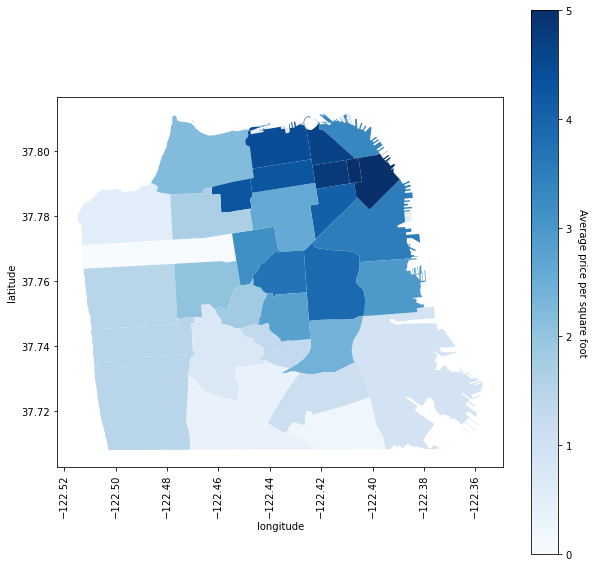

In [84]:
fig, ax = plt.subplots(1, figsize=(10, 10))
plt.xticks(rotation=90)

sf_map.plot(column="price_per_sqft", cmap="Blues", linewidth=1, ax=ax)

# Add a color bar with text
bar_info = plt.cm.ScalarMappable(cmap="Blues", norm=plt.Normalize(vmin=0, vmax=5))
bar_info._A = []
cbar = fig.colorbar(bar_info)
cbar.ax.get_yaxis().labelpad = 15
cbar.ax.set_ylabel('Average price per square foot', rotation=270)

# get axes limits
x_lo, x_up = ax.get_xlim()
y_lo, y_up = ax.get_ylim()
# add minor ticks with a specified spacing (deg)
deg = 1
ax.set_xticks(np.arange(np.ceil(x_lo), np.ceil(x_up), deg), minor=True)
ax.set_yticks(np.arange(np.ceil(y_lo), np.ceil(y_up), deg), minor=True)
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
